In [9]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import cv2
import PIL 
import pathlib 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
img_width, img_height=497, 368

In [10]:
data = tf.keras.utils.image_dataset_from_directory(directory="D:\\LANE_FYP\\Data_V2", image_size=(img_height, img_width))

Found 386 files belonging to 2 classes.


In [11]:
train_size = int(len(data) * .7)
test_size = int(len(data) * .2) + 1
val_size = int(len(data) * .1) + 1

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [14]:
resnet_model = Sequential() 
pretrained_model= tf.keras.applications.ResNet50(include_top=False, input_shape=(368, 497,3), pooling='avg',classes=2, weights='imagenet') 
for layer in pretrained_model.layers: 
    layer.trainable=False 

resnet_model.add(pretrained_model) 
resnet_model.add(Flatten()) 
resnet_model.add(Dense(512, activation='relu')) 
resnet_model.add(Dense(1, activation='sigmoid'))

In [15]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
hist = resnet_model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
9/9 [==============================] - 58s 6s/step - loss: 1.1298 - accuracy: 0.5764 - val_loss: 0.6267 - val_accuracy: 0.5312
Epoch 2/20
9/9 [==============================] - 56s 6s/step - loss: 0.4179 - accuracy: 0.7569 - val_loss: 0.2343 - val_accuracy: 0.9531
Epoch 3/20
9/9 [==============================] - 58s 7s/step - loss: 0.2081 - accuracy: 0.9618 - val_loss: 0.1668 - val_accuracy: 0.9531
Epoch 4/20
9/9 [==============================] - 56s 6s/step - loss: 0.1435 - accuracy: 0.9722 - val_loss: 0.1046 - val_accuracy: 0.9844
Epoch 5/20
9/9 [==============================] - 59s 7s/step - loss: 0.0938 - accuracy: 0.9896 - val_loss: 0.0649 - val_accuracy: 1.0000
Epoch 6/20
9/9 [==============================] - 57s 6s/step - loss: 0.0718 - accuracy: 0.9965 - val_loss: 0.0762 - val_accuracy: 0.9844
Epoch 7/20
9/9 [==============================] - 61s 7s/step - loss: 0.0579 - accuracy: 0.9965 - val_loss: 0.0631 - val_accuracy: 0.9844
Epoch 8/20
9/9 [==================

In [17]:
model_evaluation= resnet_model.evaluate(val, batch_size = 32)

2/2 [==============================] - 11s 5s/step - loss: 0.0111 - accuracy: 1.0000


In [18]:
resnet_model.save("resnet_model_v2")

INFO:tensorflow:Assets written to: resnet_model_lane_v2\assets


INFO:tensorflow:Assets written to: resnet_model_lane_v2\assets


In [19]:
resnet_model.evaluate(test, batch_size=32)

2/2 [==============================] - 6s 370ms/step - loss: 0.0168 - accuracy: 1.0000


[0.016848357394337654, 1.0]

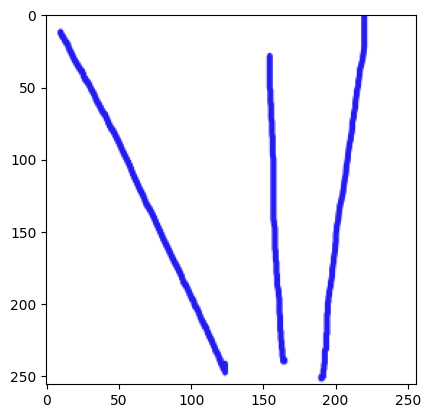

1/1 [==============================] - 0s 216ms/step
[[0.4479521]]
Safe Driving


In [28]:
img1 = cv2.imread("D:\\LANE_FYP\\Data_V2\\Safe Data\\s1.png")
plt.imshow(tf.image.resize(img1, (256,256)).numpy().astype(int))
plt.show()
resize1 = cv2.resize(img1, (img_width, img_height))
image1 = np.expand_dims(resize1,axis=0)
pred1=resnet_model.predict(image1)
print("Safe Driving" if pred1 < 0.5 else "Reckless Driving")

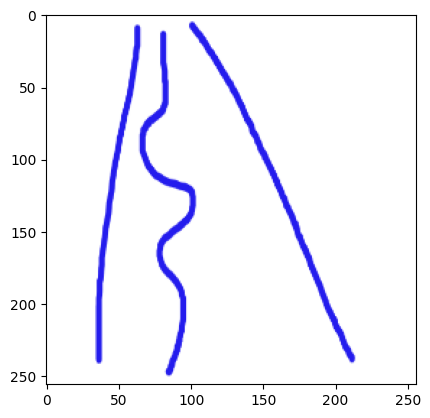

1/1 [==============================] - 0s 249ms/step
[[0.99991095]]
Reckless Driving


In [29]:
img2 = cv2.imread("D:\\Lane_FYP\\Data_V2\\Unsafe Data\\1.png")
plt.imshow(tf.image.resize(img2, (256,256)).numpy().astype(int))
plt.show()
resize2 = cv2.resize(img2, (img_width, img_height))
image2 = np.expand_dims(resize2,axis=0)
pred2=resnet_model.predict(image2)
print("Safe Driving" if pred2 < 0.5 else "Reckless Driving")